# **Convolutional Neural Networks**
## Project: Write an Algorithm for a  White Blood Cells Identification App
## Why We're Here

In this notebook, i will make the first steps towards developing an algorithm that could be used as part of a mobile or web app. At the end of this project, my code will accept any user-supplied image as input.and it will provide an estimate of the cell's type.

## The Road Ahead
I break the notebook into separate steps.

   *  Step 0: Import Datasets
   *  Step 1: Extract Bottleneck Features for Train set, valid set, Test Set.
   *  Step 2: rescale the images by dividing every pixel in every image by 255.
   *  Step 3: Obtain Bottleneck Features
   *  Step 4: create Model Architecture
   *  Step 5: Train the Model
   *  Step 6: Test the Model
   *  Step 7: preprocessing steps supply images to a pre-trained network in Keras
   *  Step 8: Test the Model on Sample Images!

## Step 0: Import Blood Cells Datasets








In [8]:
import os
import cv2
import scipy
from scipy import misc
import numpy as np

cell_types = {1:'NEUTROPHIL',2:'EOSINOPHIL',3:'MONOCYTE',4:'LYMPHOCYTE'}
cell_sub_types = {0:'Mononuclear',1:'Polynuclear'}
from tqdm import tqdm
def load_data(path):
    """
    Load the data and labels from the given folder.
    """
    X = []
    y = []
    z = []
    for wbc_type in os.listdir(path):
        if not wbc_type.startswith('.'):
            if wbc_type in ['NEUTROPHIL']:
                label = 1
                label2 = 1
            elif wbc_type in ['EOSINOPHIL']:
                label = 2
                label2 = 1
            elif wbc_type in ['MONOCYTE']:
                label = 3  
                label2 = 0
            elif wbc_type in ['LYMPHOCYTE']:
                label = 4 
                label2 = 0
            else:
                label = 5
                label2 = 0
            for image_filename in tqdm(os.listdir(path + wbc_type)):
                img_file = cv2.imread(path + wbc_type + '/' + image_filename)
                if img_file is not None:
                    img_file = scipy.misc.imresize(arr=img_file, size=(120, 120, 3))
                    img_arr = np.asarray(img_file)
                    X.append(img_arr)
                    y.append(label)
                    z.append(label2)
    X = np.asarray(X)
    y = np.asarray(y)
    z = np.asarray(z)
    return X,y,z
train_files, train_cell_type, train_sub_type = load_data('/content/dataset2-master/images/TRAIN/')
valid_files, valid_cell_type, valid_sub_type = load_data('/content/dataset2-master/images/VALID/')
test_files, test_cell_type, test_sub_type = load_data('/content/dataset2-master/images/TEST/')

# Encode labels to hot vectors
from keras.utils.np_utils import to_categorical

train_cell_type_hot = to_categorical(train_cell_type, num_classes = 5)
valid_cell_type_hot = to_categorical(valid_cell_type, num_classes = 5)
test_cell_type_hot = to_categorical(test_cell_type, num_classes = 5)
train_sub_type_hot = to_categorical(train_sub_type, num_classes = 2)
valid_sub_type_hot = to_categorical(valid_sub_type, num_classes = 2)
test_sub_type_hot = to_categorical(test_sub_type, num_classes = 2)

print(cell_types)
print(cell_sub_types)
print("Train Files Shape --> ",train_files.shape)
print("Train Cell Sub Type Shape --> ",train_sub_type_hot.shape)
print("Train Cell Type Shape --> ",train_cell_type_hot.shape)

  0%|          | 0/2000 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
100%|██████████| 624/624 [00:01<00:00, 415.27it/s]


{1: 'NEUTROPHIL', 2: 'EOSINOPHIL', 3: 'MONOCYTE', 4: 'LYMPHOCYTE'}
{0: 'Mononuclear', 1: 'Polynuclear'}
Train Files Shape -->  (8000, 120, 120, 3)
Train Cell Sub Type Shape -->  (8000, 2)
Train Cell Type Shape -->  (8000, 5)




## Step 1: Extract Bottleneck Features for Train set, valid set, Test Set
## Extract Bottleneck Features for Train Set

In [9]:
!mkdir /content/bottleneck_features
import keras
import numpy as np
from keras.applications.inception_v3 import InceptionV3, preprocess_input
import scipy
from scipy import misc
import os

model = InceptionV3(weights='imagenet', include_top=False)
print('model loaded')

if os.path.exists('/content/bottleneck_features/inception_v3_features_train.npz'):
    print('bottleneck features detected (train)')
else:
    print('bottleneck features file not detected (train)')
    print('calculating now ...')
    inception_v3_input_train = preprocess_input(train_files)
    print('train data preprocessed')
    # extract, process, and save bottleneck features
    train_features = model.predict(inception_v3_input_train)
 
    np.savez('/content/bottleneck_features/inception_v3_features_train', features=train_features)
print('bottleneck features saved (train)')


mkdir: cannot create directory ‘/content/bottleneck_features’: File exists
model loaded
bottleneck features file not detected (train)
calculating now ...
train data preprocessed
bottleneck features saved (train)


## Extract Bottleneck Features for Test Set

In [10]:
if os.path.exists('/content/bottleneck_features/inception_v3_features_test.npz'):
    print('bottleneck features detected (test)')
else:
    print('bottleneck features file not detected (test)')
    print('calculating now ...')
    inception_v3_input_test = preprocess_input(test_files)
    print('test data preprocessed')
    # extract, process, and save bottleneck features
    test_features = model.predict(inception_v3_input_test)
    
    np.savez('/content/bottleneck_features/inception_v3_features_test', features=test_features)
print('bottleneck features saved (test)')

bottleneck features file not detected (test)
calculating now ...
test data preprocessed
bottleneck features saved (test)


## Extract Bottleneck Features for Validation Set

In [11]:
if os.path.exists('bottleneck_features/inception_v3_features_valid.npz'):
    print('bottleneck features detected (valid)')
else:
    print('bottleneck features file not detected (valid)')
    print('calculating now ...')
    inception_v3_input_valid = preprocess_input(valid_files)
    print('valid data preprocessed')
    # extract, process, and save bottleneck features
    valid_features = model.predict(inception_v3_input_valid)
    
    np.savez('/content/bottleneck_features/inception_v3_features_valid', features=valid_features)
    print('bottleneck features saved (valid)')


bottleneck features file not detected (valid)
calculating now ...
valid data preprocessed
bottleneck features saved (valid)




## Step 2: rescale the images by dividing every pixel in every image by 255.

In [0]:
train_files = np.array(train_files)
train_files = train_files/255.0

valid_files = np.array(valid_files)
valid_files = valid_files/255.0

test_files = np.array(test_files)
test_files = test_files/255.0

## Step 3: Obtain Bottleneck Features

In [0]:
train_InceptionV3 = np.load('/content/bottleneck_features/inception_v3_features_train.npz')['features']
valid_InceptionV3 = np.load('/content/bottleneck_features/inception_v3_features_valid.npz')['features']
test_InceptionV3 = np.load('/content/bottleneck_features/inception_v3_features_test.npz')['features']

## Step 4: create Model Architecture and compile

In [24]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential


inception_v3_model = Sequential()
inception_v3_model.add(GlobalAveragePooling2D(input_shape=train_InceptionV3.shape[1:]))
inception_v3_model.add(Dense(128, activation='relu'))
inception_v3_model.add(Dropout(0.5))
inception_v3_model.add(Dense(5, activation='softmax'))

inception_v3_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_3 ( (None, 2048)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               262272    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 645       
Total params: 262,917
Trainable params: 262,917
Non-trainable params: 0
_________________________________________________________________


In [0]:
inception_v3_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

## Step 5: Train the Model

In [28]:
!mkdir /content/saved_models
from keras.callbacks import ModelCheckpoint

mycheckpointer= ModelCheckpoint(filepath='/content/saved_models/weights.best.myInceptionV3.hdf5', verbose=1, save_best_only=True)

inception_v3_model.fit_generator(datagen.flow(train_InceptionV3, train_cell_type_hot, batch_size=30), validation_data=(valid_InceptionV3, valid_cell_type_hot),
          epochs=30, callbacks=[mycheckpointer], verbose=1, steps_per_epoch=300, shuffle=False)

mkdir: cannot create directory ‘/content/saved_models’: File exists


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image.py:1643: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (8000, 2, 2, 2048) (2048 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


Epoch 1/30
300/300 [==============================] - 300s 1s/step - loss: 1.3413 - acc: 0.4177 - val_loss: 1.0095 - val_acc: 0.5662

Epoch 00001: val_loss improved from inf to 1.00945, saving model to /content/saved_models/weights.best.myInceptionV3.hdf5
Epoch 2/30
300/300 [==============================] - 299s 998ms/step - loss: 1.0620 - acc: 0.5339 - val_loss: 0.8990 - val_acc: 0.6198

Epoch 00002: val_loss improved from 1.00945 to 0.89900, saving model to /content/saved_models/weights.best.myInceptionV3.hdf5
Epoch 3/30
300/300 [==============================] - 302s 1s/step - loss: 0.9787 - acc: 0.5744 - val_loss: 0.8759 - val_acc: 0.6377

Epoch 00003: val_loss improved from 0.89900 to 0.87590, saving model to /content/saved_models/weights.best.myInceptionV3.hdf5
Epoch 4/30
300/300 [==============================] - 300s 999ms/step - loss: 0.9287 - acc: 0.6007 - val_loss: 0.8066 - val_acc: 0.6515

Epoch 00004: val_loss improved from 0.87590 to 0.80656, saving model to /content/sav


## Load the Model with the Best Validation Loss

In [0]:
inception_v3_model.load_weights('/content/saved_models/weights.best.myInceptionV3.hdf5')

## Step 6: Test the Model

In [30]:
inception_v3_predictions = [np.argmax(inception_v3_model.predict(np.expand_dims(feature, axis=0))) for feature in test_InceptionV3]

test_accuracy_inception_v3 = 100*np.sum(np.array(inception_v3_predictions)==np.argmax(test_cell_type_hot, axis=1))/len(inception_v3_predictions)
print('Final test accuracy: %.4f%%' % test_accuracy_inception_v3)

Final test accuracy: 59.3486%




## Step 7: preprocessing steps supply images to a pre-trained network in Keras 

In [0]:
from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(120, 120))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

## Predict fruit category with the Model

In [0]:
from extract_bottleneck_features import *

def InceptionV3_predict_cell(img_path):
    # extract bottleneck features
    bottleneck_feature = extract_InceptionV3(path_to_tensor(img_path));
    # obtain predicted vector
    predicted_vector = inception_v3_model.predict(bottleneck_feature);
    # return dog breed that is predicted by the model
    return cell_types[np.argmax(predicted_vector)]

## show image and estimate of the fruit's category.

In [0]:
import cv2
import matplotlib.pyplot as plt                        
%matplotlib inline

def Blood_Cell_classifier(img_path):
     cell = InceptionV3_predict_cell(img_path) 
    
    # Display the image
     img = cv2.imread(img_path)
     cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
     plt.imshow(cv_rgb)
     plt.show()
    
    # Detect what it is
     if InceptionV3_predict_cell(img_path):
        print("That's a cell. type: " + str(cell))
    
     else:
        print("I can't detect anything!")



## Step 8: Test the Model on Sample Images!

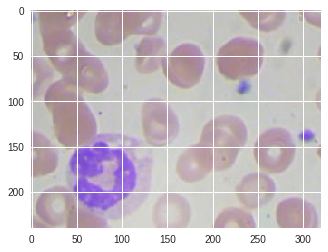

That's a cell. type: LYMPHOCYTE


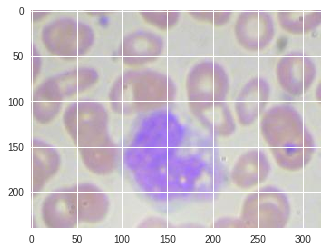

That's a cell. type: NEUTROPHIL


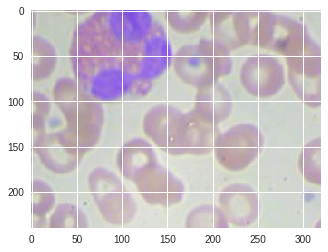

That's a cell. type: EOSINOPHIL


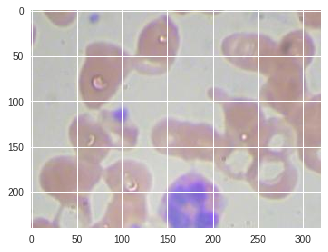

That's a cell. type: EOSINOPHIL


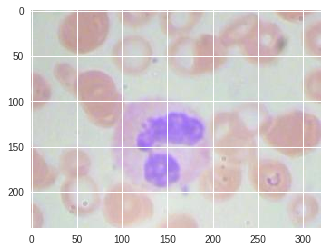

That's a cell. type: NEUTROPHIL


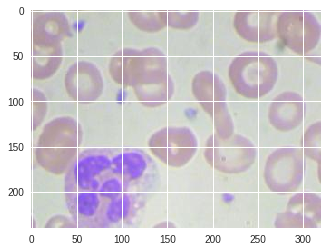

That's a cell. type: MONOCYTE


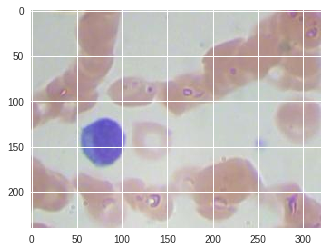

That's a cell. type: EOSINOPHIL


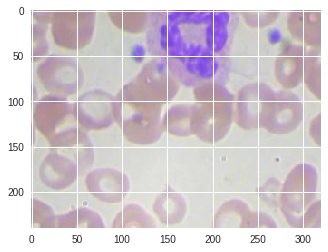

That's a cell. type: EOSINOPHIL


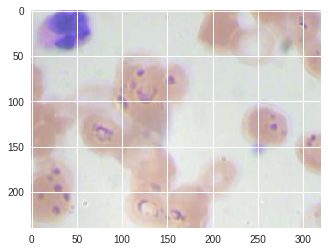

In [0]:
from glob import glob

images=np.array(glob("/content/dataset2-master/TEST_SIMPLE/*"))
for path in images:
    Blood_Cell_classifier(path)